<a href="https://colab.research.google.com/github/lucaricciatl/NeuralNetworkExamples/blob/main/LinearRegressionLecture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt


Get the dataset from github using wget and load the csv using pandas

In [ ]:
!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

--2023-03-26 19:59:42--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv’

moore.csv           100%[===================>]   2.25K  --.-KB/s    in 0s      

2023-03-26 19:59:42 (47.9 MB/s) - ‘moore.csv’ saved [2302/2302]



In [ ]:
data = pd.read_csv('moore.csv',on_bad_lines='skip')

Analyze the data

In [ ]:
!cat moore.csv

1971,2300
1972,3500
1973,2500
1973,2500
1974,4100
1974,4500
1974,8000
1975,3510
1976,5000
1976,8500
1976,6500
1978,9000
1978,29000
1979,17500
1979,29000
1979,68000
1981,11500
1982,55000
1982,134000
1983,22000
1984,63000
1984,190000
1985,275000
1985,25000
1985,16000
1986,110000
1986,375000
1986,30000
1987,385000
1987,730000
1987,273000
1987,553000
1988,180000
1988,250000
1989,600000
1989,1000000
1989,1180235
1989,310000
1990,1200000
1991,1350000
1991,35000
1992,600000
1992,900000
1993,2800000
1993,3100000
1994,578977
1994,2500000
1995,2500000
1999,111000
1995,5500000
1996,4300000
1997,10000000
1997,7500000
1997,8800000
1998,7500000
1999,9500000
1999,13500000
2000,21000000
2000,21000000
1999,27400000
1999,21300000
1999,22000000
2000,42000000
2001,191000000
2001,45000000
2002,55000000
2004,112000000
2004,400000000
2005,169000000
2006,184000000
2005,228000000
2006,362000000
2007,540000000
2008,47000000
2003,54300000
2003,105900000
2002,220000000
2005,165000000
2005,250000000
2006,291000000

In [ ]:
print(data) #year and number of transistor

     1971         2300
0    1972         3500
1    1973         2500
2    1973         2500
3    1974         4100
4    1974         4500
..    ...          ...
156  2017  18000000000
157  2017  19200000000
158  2018   8876000000
159  2018  23600000000
160  2018   9000000000

[161 rows x 2 columns]


In [ ]:
data = data.to_numpy() #convert to numpy array

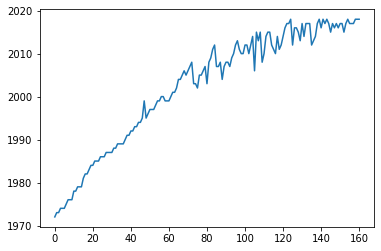

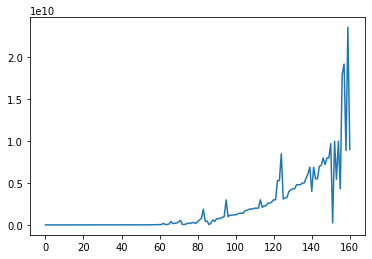

In [ ]:
X_data = data[:,0]
Y_data = data[:,1]

plt.figure(1)
plt.plot(X_data)
plt.figure(2)
plt.plot(Y_data)

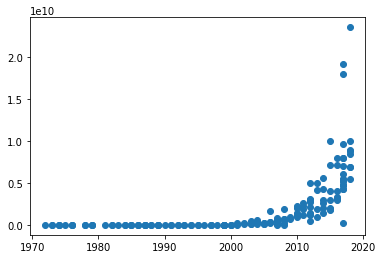

In [ ]:
X = X_data.reshape(-1,1) #make an NxD matrix
Y = Y_data

plt.figure(3)
plt.scatter(X,Y)

Since the function is following an exponential growth we can use the log to make it linear and so we are able to use linear regression

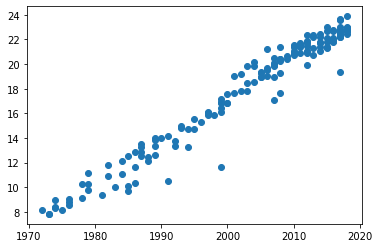

In [ ]:
Y = np.log(Y)
plt.figure(4)
plt.scatter(X,Y)

We can center the data in the mean of them using the following:


In [ ]:
X = X-X.mean()

Now we can define the model

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(1),
])

In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.SGD(0.001,0.9), #this optimizer uses the gradied descend with momentum
    loss="mse" #use mean square error as loss function
)

In [ ]:
def schedule(epoch,lr): #this function can be usefull to change the learning rate ongoing
  if epoch>=50:         #we can change the learning rate every iteration
    return 0.0001
  return 0.001

In [ ]:
scheduler = tf.keras.callbacks.LearningRateScheduler(schedule) #change the learning rate in compliance with the function schedule that we have previously created

In [ ]:
r = model.fit(X,Y,epochs=200, callbacks=[scheduler])

Epoch 1/200
6/6 [==============================] - 0s 3ms/step - loss: 617.6917 - lr: 0.0010
Epoch 2/200
6/6 [==============================] - 0s 2ms/step - loss: 690.8251 - lr: 0.0010
Epoch 3/200
6/6 [==============================] - 0s 2ms/step - loss: 485.1085 - lr: 0.0010
Epoch 4/200
6/6 [==============================] - 0s 2ms/step - loss: 255.7891 - lr: 0.0010
Epoch 5/200
6/6 [==============================] - 0s 3ms/step - loss: 153.7268 - lr: 0.0010
Epoch 6/200
6/6 [==============================] - 0s 2ms/step - loss: 194.7958 - lr: 0.0010
Epoch 7/200
6/6 [==============================] - 0s 2ms/step - loss: 157.8592 - lr: 0.0010
Epoch 8/200
6/6 [==============================] - 0s 2ms/step - loss: 95.1713 - lr: 0.0010
Epoch 9/200
6/6 [==============================] - 0s 2ms/step - loss: 64.7329 - lr: 0.0010
Epoch 10/200
6/6 [==============================] - 0s 2ms/step - loss: 48.9230 - lr: 0.0010
Epoch 11/200
6/6 [==============================] - 0s 2ms/step - loss: 

Plot the loss to see if the prediction is good

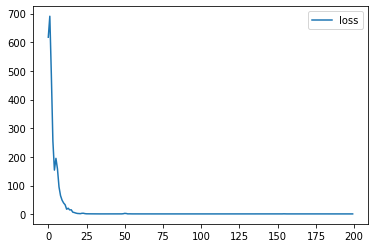

In [ ]:
plt.figure(5)
plt.plot(r.history['loss'],label='loss')
plt.legend();

What we would like to do is to predict new data but this part is only modeling.

In [ ]:
model.layers[0].get_weights() #this fucntion return a list that has inside the weights of the fully connected layers

[array([[0.34658176]], dtype=float32), array([17.824215], dtype=float32)]

In [ ]:
a = model.layers[0].get_weights()[0][0,0]

print(a) #this is the weight of the network
         #and it is the only value that we need to predicts new data
         

0.34658176


The model for exponential growth is the following:

$C(t) = A_o \cdot r^t$

In this case C represent the transistor count over time (t), and r represent the increses.

$r > 1$ implies a positive growth.

$r < 1$ implies a negative growth.

applying the log operator we obtain:


$log({C})=log({r})*t+log({A_0})$ 

And that is similar to the linear equation.

The meaning of the weight that we found is $log{(r)}$.

${log{(r)} = 0.341 ...}$ 

$r = 1.407 ...$ --> rate of growth


